## You Will Build a Model With the Movie Reviews Dataset that you Worked with in Week 3: Bag of Words Meets Bags of Popcorn. 

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

### 1. Get the stemmed data using the same process you did in Week 3.

**Import Data**

In [3]:
unlabeled_df = pd.read_csv("Datasets/unlabeledTrainData.tsv", sep='\t', on_bad_lines='warn')

Skipping line 43043: expected 2 fields, saw 3



In [4]:
test_df = pd.read_csv('Datasets/testData.tsv', sep= '\t')

In [5]:
labeled_df = pd.read_csv("Datasets/labeledTrainData.tsv", sep= "\t")

In [6]:
labeled_df.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
# initialize PorterStemmer
porter_stemmer = PorterStemmer()

In [8]:
# creating a tokenized_sentence column
labeled_df['tokenized_sentence'] = labeled_df.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)

In [9]:
# creating a stem column
labeled_df['stem'] = labeled_df['tokenized_sentence'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [10]:
# checking forst five rows of dataframe
labeled_df.head(5)

,id,sentiment,review,tokenized_sentence,stem
0,5814_8,1,With all this stuff going down at the moment w...,"[With, all, this, stuff, going, down, at, the,...","[with, all, thi, stuff, go, down, at, the, mom..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","[\The, Classic, War, of, the, Worlds\, '', by,...","[\the, classic, war, of, the, worlds\, '', by,..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"[The, film, starts, with, a, manager, (, Nicho...","[the, film, start, with, a, manag, (, nichola,..."
3,3630_4,0,It must be assumed that those who praised this...,"[It, must, be, assumed, that, those, who, prai...","[it, must, be, assum, that, those, who, prais,..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"[Superbly, trashy, and, wondrously, unpretenti...","[superbl, trashi, and, wondrous, unpretenti, 8..."


### 2. Split this into a training and test set.

In [11]:
# import additional tools
from sklearn.model_selection import train_test_split

In [12]:
# splitting the selected columns for logistic regression into 'train' and 'test' groups.
x_train, x_test, y_train, y_test = train_test_split(labeled_df['stem'], labeled_df['sentiment'], test_size=0.2,random_state=0)

### 3. Fit and apply the tf-idf vectorization to the training set.

In [13]:
# importing additional libraries
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer

In [14]:
# initializing the tfidf function, using analyzer = lambda for lists
tfidf = TfidfVectorizer(analyzer=lambda x: x)

In [15]:
# converting the x_train pandas series to a numoy array
x_train = np.array(x_train)

In [16]:
# using the tfidf function on the training set that tranforms and FITS the data
x_train=tfidf.fit_transform(x_train)

In [17]:
# checking the shape
x_train.shape

(20000, 88186)

### 4. Apply but DO NOT FIT the tf-idf vectorization to the test set.

In [18]:
# converting the pandas series to a numpy array
x_test = np.array(x_test)

In [19]:
# apply the tf-idf vectorization without fitting
x_test=tfidf.transform(x_test)

In [20]:
# viewing the shape of the test data
x_test.shape

(5000, 88186)

### 5. Train a logistic regression using the training data.


In [21]:
# importing additional tools
from sklearn.linear_model import LogisticRegression

In [22]:
# initializing the logistic regression model
logmodel = LogisticRegression()

In [23]:
# using the log model on the training data
logmodel.fit(x_train,y_train)

LogisticRegression()

### 6. Find the model accuracy on test set.

In [24]:
# importing additional tools 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [25]:
# using .score method to calculate the accuracy of the logistic regression model
score = logmodel.score(x_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.894


### 7. Create a confusion matrix for the test set predictions. 

In [26]:
# creating predictions to create the confusion matrix
predictions = logmodel.predict(x_test)

In [27]:
# creating confusion matrix of y_test vs predictions
confusion_matrix(y_test, predictions)

array([[2265,  283],
       [ 247, 2205]], dtype=int64)

### 8. Get the precision, recall, and F1-score for the test set predictions.

In [28]:
# using classification_report funciton
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2548
           1       0.89      0.90      0.89      2452

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



### 9. Create a ROC curve for the test set.

In [29]:
# importing additional libraries
from sklearn import metrics
import matplotlib.pyplot as plt

In [30]:
#define metrics for roc curve
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

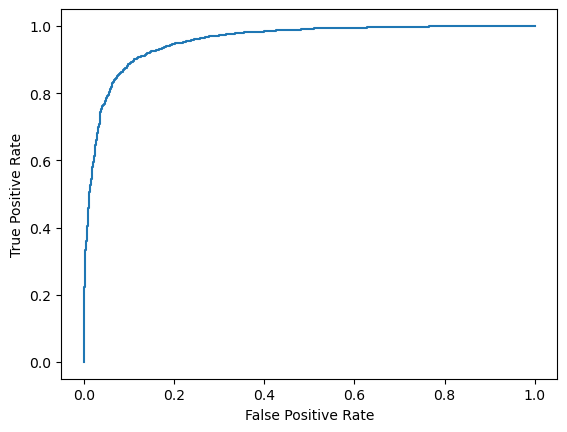

In [31]:
#define metrics
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [33]:
# initializing naive bayes model
nb_model = GaussianNB()

In [34]:
# trianing model on the training data
nb_model.fit(x_train.toarray(), y_train)

GaussianNB()

In [35]:
# creating predicitons based on the naive bayes model
y_nb_predict = nb_model.predict(x_test.toarray())

In [36]:
# checking accuracy of the model
accuracy = accuracy_score(y_test, y_nb_predict)
accuracy

0.675

In [37]:
# retriveing precision, recall ,f1-score
print(classification_report(y_test, y_nb_predict))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70      2548
           1       0.69      0.62      0.65      2452

    accuracy                           0.68      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.68      0.68      0.67      5000



It is easy to see which classification model performed better between the Naive Bayes and Logistic Regression. The Logistic Regression model had an accuracy percentage of 89.4% while the Naive Bayes model had an accuracy percentage of 67.5%. 